In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

interval_times = [6.98, 6.10, 2.76, 3.86, 1.71, 3.96, 3.01, 4.23, 3.96,
                  4.26, 4.13, 3.53, 4.23, 2.56, 3.71, 3.00, 4.75, 4.10,
                  3.86, 3.03, 1.23]

In [3]:
### Load Data
raw_data = pd.read_csv("..\data\data3.csv", delimiter=',', header=None, names=['Time', 'Signal'])
raw_data['State'] = -1  # Adds a column with all zeros

### Normalize Signal (Y)
Y = raw_data['Signal'].values.reshape(-1, 1)  # Convert to numpy array and reshape

scaler = StandardScaler()
Y = scaler.fit_transform(Y).flatten()  # Normalize and flatten

raw_data['Signal'] = Y  # Update the DataFrame with normalized signal

### Normalize Time
start_time = raw_data.iloc[0, 0]
raw_data['Time'] = (raw_data['Time'] - start_time) / 1000  # Convert ms to s

### Check Final DataFrame
print(raw_data.head())


    Time    Signal  State
0  0.000 -0.883134     -1
1  0.050 -0.766810     -1
2  0.100 -0.766810     -1
3  0.151 -0.679567     -1
4  0.201 -0.795891     -1


        Time    Signal  State
0      0.000 -0.883134      0
1      0.050 -0.766810      0
2      0.100 -0.766810      0
3      0.151 -0.679567      0
4      0.201 -0.795891      0
...      ...       ...    ...
1527  76.781 -1.057619      1
1528  76.831 -1.028538      1
1529  76.881 -1.086700      1
1530  76.932 -1.086700      1
1531  76.982 -1.144862      1

[1532 rows x 3 columns]


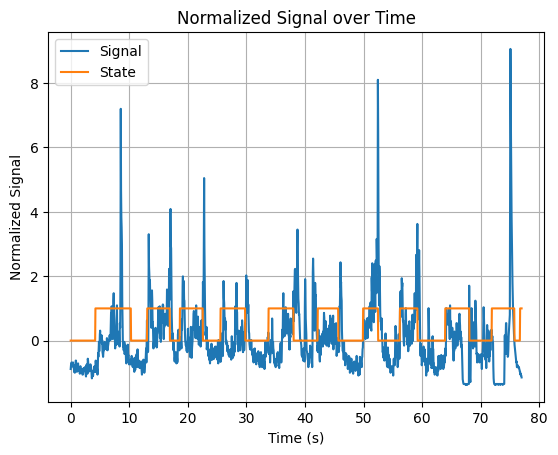

In [16]:
df_counter = 0

start_time = -2.8

for i in range(len(interval_times)-1):
    
    end_time = start_time + interval_times[i]
        
    raw_data.loc[raw_data["Time"].between(start_time, end_time), "State"] = (i)%2
            
    start_time = end_time
    
    #print(cur_interval)
    
    #print(mean)    
    
print(raw_data)


### Plot the Data
raw_data.plot.line(x='Time', y=['Signal','State'], title='Normalized Signal over Time')
plt.xlabel('Time (s)')
plt.ylabel('Normalized Signal')
plt.grid(True)
plt.show()


